In [11]:
import numpy as np

In [12]:
# Even though the code is extremely similiar to Ridge Regression, the only difference is the penalty term in the gradient descent step, where the absolute value of the weights is added to the gradient of the loss function instead of the sqaured terms in Ridge Regression.abs 
# The reason why that happens is because the L1 norm is used instead of the L2 norm, and the L1 norm is the sum of the absolute values of the weights, and the L2 norm is the sum of the squared values of the weights.
# What this can do is make the model more sensitive to the features that are not important and make the weights of those features 0, which is a form of feature selection.
# While in Ridge Regression the weights are close to 0 but not exactly 0, in Lasso Regression the weights can be exactly 0, which can be useful in some cases.

class LassoRegression:
    def __init__(self, alpha: int = 1.0, lr: int = 0.01, n_iters: int = 1000):
        #alpha here is our regularization parameter, if alpha = 0 then we have a simple linear regression and if alpha = infinity then we have a constant model (all weights are 0)
        self.alpha = alpha
        self.weights = None
        self.bias = None
        self.lr = lr
        self.n_iters = n_iters
    
    def fit(self, X, y):
        # initialize the sample(x) and the features(y) array
        num_samples, num_features = X.shape
        # initialize the weights array randomly of size num_features
        self.weights = np.zeros( num_features )
        self.bias = 0 # value of c(intercept)

        for i in range(self.n_iters):
            # calculate the predicted value
            y_predicted = np.dot(X, self.weights) + self.bias
            # the dw gradient of the loss function adds the penalty term in order to prevent overfitting and regularize the model for future predictions
            dw = 2 * (1/num_samples) * np.dot(X.T, (y_predicted - y)) +  (self.alpha/num_samples) * abs(self.weights)
            db = 2 * (1/num_samples) * np.sum(y_predicted - y) 
            # update the weights
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias 

Testing our Lasso Regression Model


In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [14]:
# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=4)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (350, 1)
y_train shape: (350,)
X_test shape: (150, 1)
y_test shape: (150,)


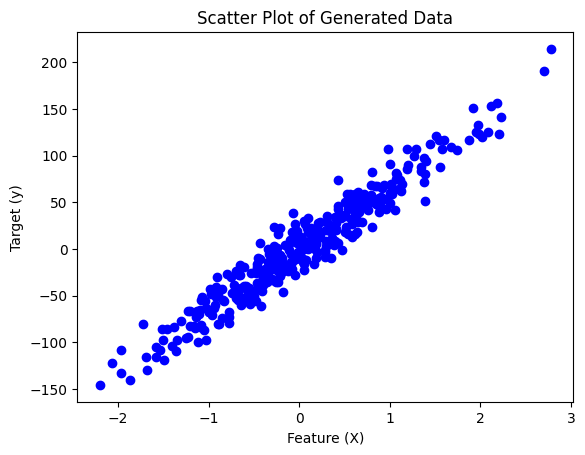

In [15]:
# Scatter plot of the data points
plt.scatter(X_train, y_train, color='blue', marker='o', label='Data points')

# Add labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Scatter Plot of Generated Data')

# Display the plot
plt.show()


In [16]:
lassoReg = LassoRegression()
lassoReg.fit(X_train, y_train)
predictions = lassoReg.predict(X_test)
print(predictions)

[-6.30621942e+01  1.07947162e+02  2.80453622e+01 -7.16044028e+01
 -7.33946582e+01  1.49806165e+02 -8.43963283e+00  1.28390806e+02
 -2.45560874e+01  9.24622630e+01  6.67919183e+01  8.10988540e+01
 -2.20140480e+01 -9.51986975e+01 -1.11835210e+02 -1.06045996e+02
 -1.16520409e+01  5.51651910e+01 -7.90050252e+01 -7.57669665e+00
 -1.04415451e+02  5.35596707e+01  8.46092461e+01 -5.13566414e+01
  1.27900011e+02  2.29196260e+00 -2.31939289e+01  1.45971428e+01
 -3.08067297e+01  3.35953010e+01 -7.25368649e+01  4.44183686e+01
  3.12904136e+00 -1.82849041e+01  3.51626767e+01  1.95429891e+01
 -1.23826137e+02  7.50888890e+00  4.28962166e+01 -3.19710462e+01
  1.10191363e+02  1.60481979e+02 -9.67783340e+01  6.85700662e+01
  2.31886491e+01 -2.23432170e+01 -1.61005823e+02  1.34128290e+02
  1.11685808e+02 -8.78916634e+01 -6.55226377e+01 -1.51509246e+02
  2.79788888e+01  5.45400807e+01 -7.50410523e+01 -1.55812578e+02
 -2.79846706e+01 -8.90697019e+01  9.07000220e+01  1.84680550e+01
 -7.91251828e+01  1.15191

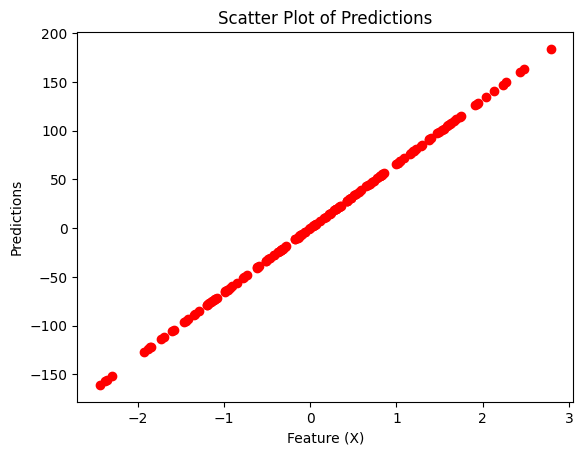

In [17]:
# Scatter plot of the data points
plt.scatter(X_test, predictions, color='red', marker='o', label='Predictions')

# Add labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Predictions')
plt.title('Scatter Plot of Predictions')

# Display the plot
plt.show()

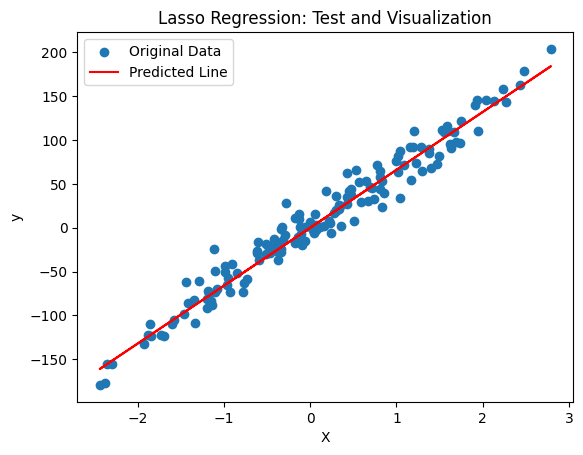

In [18]:
plt.scatter(X_test, y_test, label='Original Data')
plt.plot(X_test, predictions, color='red', label='Predicted Line')

    # Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression: Test and Visualization')

    # Add a legend
plt.legend()

    # Display the plot
plt.show()